In [1]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

ROOT_DIR = os.path.abspath("./")
sys.path.append(ROOT_DIR)

from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
import forest_detect
from mrcnn.model import log

%matplotlib inline 

Using TensorFlow backend.


In [2]:
class InferenceConfig(forest_detect.DetectConfig):
    NAME = "test"
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    NUM_CLASSES = 1 + 13
    
config = InferenceConfig()

class_names = ['BG'
               , 'tree', 'person', 'person_ab', 'people'
               , 'forest', 'road', 'hiking_trail'
               , 'rock', 'rocks', 'lawn', 'restarea'
               , 'parking_lot', 'car'
               ]

In [3]:
MODEL_PATH = os.path.join(ROOT_DIR, "pre_trained_c13.h5")
testset = ROOT_DIR + "/datasets"
subset= "test"

In [4]:
import warnings
warnings.filterwarnings(action='ignore')

IMG_DIR = os.path.join(testset, subset)

model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_PATH, config=config)
warnings.filterwarnings(action='ignore')
model.load_weights(MODEL_PATH, by_name=True)
warnings.filterwarnings(action='ignore')

dataset_test = forest_detect.ForestDataset()
dataset_test.load_dataset(dataset_dir = testset, subset= subset, class_ids = None)
dataset_test.prepare()






Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.





loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


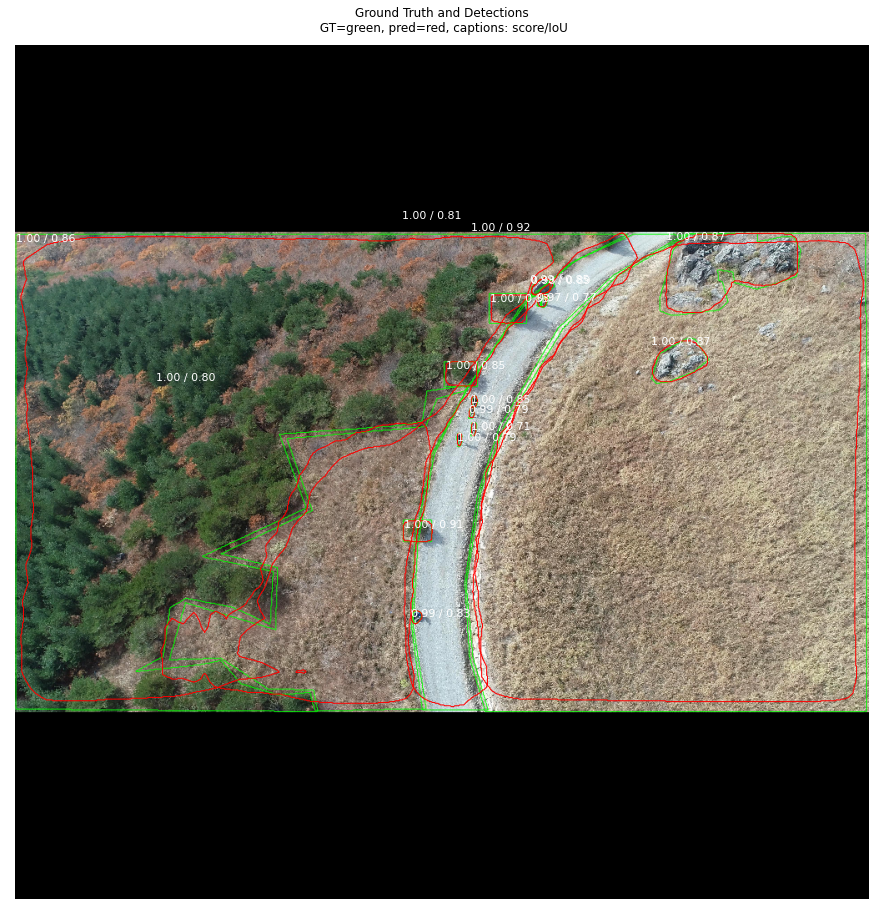

count_gt : 19,  count_match : 17 
Match Rate :  0.8947368421052632


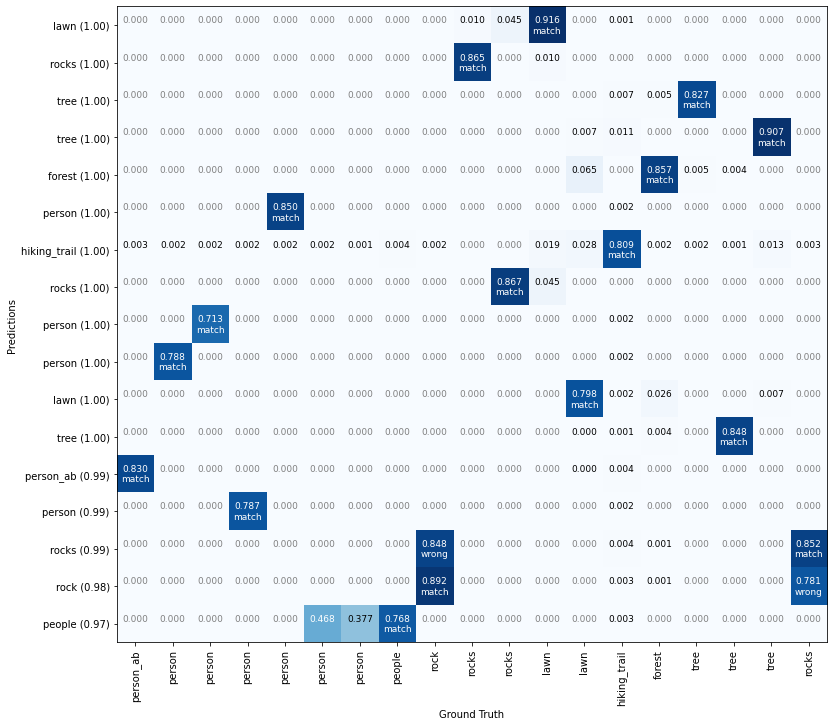

In [5]:
image_id = random.choice(dataset_test.image_ids) # = dataset_test.image_ids[image ID for evaluation]
info = dataset_test.image_info[image_id]

image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset_test, config, image_id, use_mini_mask=False)

# Run detection
results = model.detect([image], verbose=0)
r = results[0]

display_show_box = False
display_show_mask = False
visualize.display_differences(image, gt_bbox, gt_class_id, gt_mask, r['rois'], r['class_ids'],r['scores'],r['masks'],
                              class_names, ax=None, show_box=display_show_box, show_mask=display_show_mask)

count_gt, count_match, match_rate, overlaps = forest_detect.evaluate_image(gt_bbox, gt_class_id, gt_mask, r)
visualize.plot_overlaps(gt_class_id, r['class_ids'], r['scores'], overlaps, class_names, threshold=0.5)

print('count_gt : %d,  count_match : %d ' %(count_gt, count_match))
print("Match Rate : ", match_rate)